Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score

Load Data & Preprocessing & Exploration

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()
# df.info()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Impalanced Data

In [4]:
df.Class.value_counts()  

0    284315
1       492
Name: Class, dtype: int64

In [14]:
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority)*5,
                                   random_state=42)
df2 =pd.concat([df_majority_downsampled , df_minority])
dataset = df2.sample(frac=1, random_state=42).reset_index(drop=True) 
len(dataset)

2952

In [15]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,151052.0,-6.709845,-1.583163,-5.330014,0.831145,1.962362,-0.354285,1.212362,-0.651593,2.503813,...,-0.897548,0.752091,-2.100602,-1.643975,-1.803765,-0.810536,-0.903108,2.144212,196.14,0
1,50746.0,-3.501425,3.134779,-0.372550,-2.313541,-0.316076,0.041044,-0.233065,-1.300863,2.346608,...,1.040585,-1.087978,0.175143,-0.889738,0.432912,0.772239,0.794321,0.214356,0.76,0
2,65294.0,0.376080,0.685730,0.484872,0.949500,0.181993,-0.172272,0.090994,-0.946729,-0.246640,...,0.779709,-0.257737,-0.374883,-0.442127,0.868275,-0.167901,0.194843,0.237779,35.59,0
3,66388.0,-0.413466,1.087993,1.574373,-0.037968,-0.020730,-0.879095,0.750328,-0.100543,-0.485818,...,-0.220810,-0.546726,-0.027098,0.376907,-0.172893,0.069472,0.268818,0.122295,3.99,0
4,82454.0,-0.334801,1.097011,0.652334,1.029438,-0.418115,-0.805092,0.450643,0.275868,-0.639194,...,0.189588,0.378956,0.035218,0.378324,-0.135534,-0.327481,-0.059497,-0.016602,45.60,0


In [16]:
dataset.Class.value_counts()

0    2460
1     492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

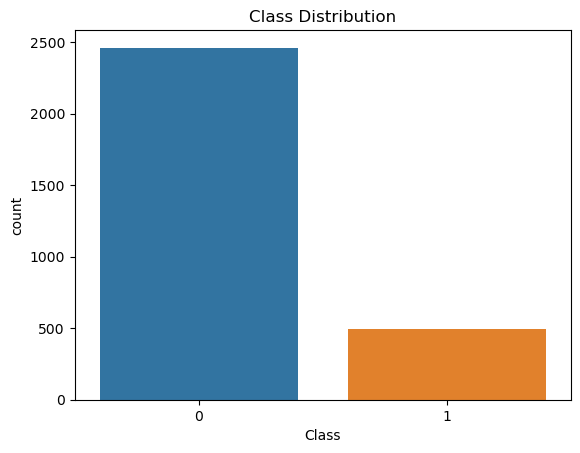

In [17]:
sns.countplot(x=dataset.Class ,data = dataset)
plt.title('Class Distribution')

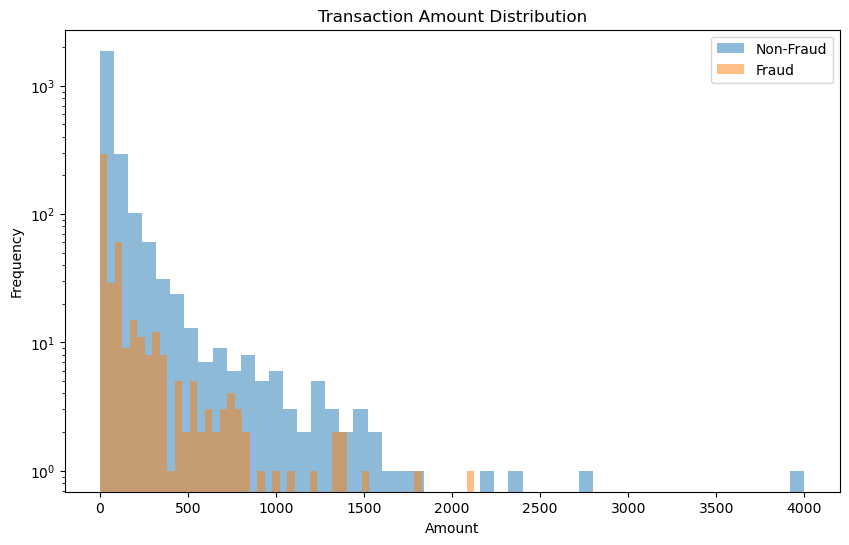

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['Class'] == 0]['Amount'], bins=50, alpha=0.5, label='Non-Fraud')
plt.hist(dataset[dataset['Class'] == 1]['Amount'], bins=50, alpha=0.5, label='Fraud')
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

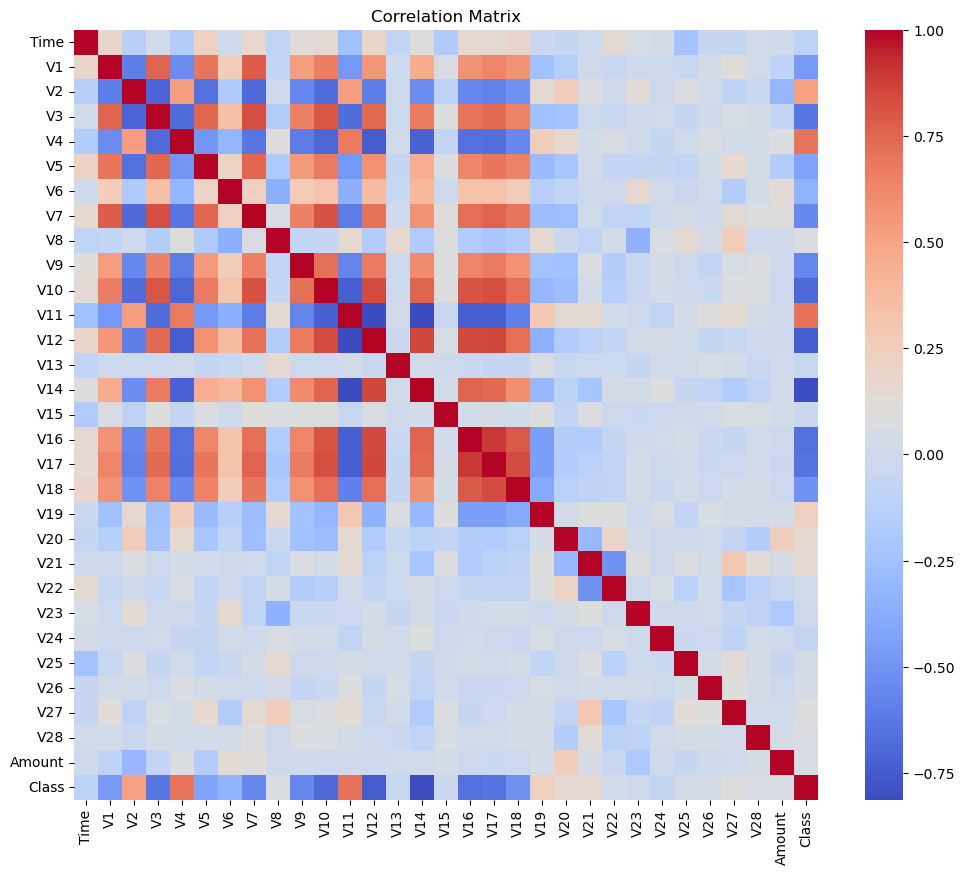

In [19]:
plt.figure(figsize=(12, 10))
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False ,color=['Red','yellow'])
plt.title('Correlation Matrix')
plt.show()

In [20]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
mean,92532.301491,-0.804534,0.564072,-1.201008,0.745979,-0.472148,-0.235164,-0.946182,0.101100,-0.420075,...,0.121132,0.005655,-0.010710,-0.015393,-0.005323,0.006132,0.026808,0.016368,91.603455,0.166667
std,47987.819983,3.758173,2.710198,4.117980,2.422184,2.798330,1.549425,3.740097,2.963971,1.725863,...,1.726198,0.894943,0.792198,0.600608,0.572566,0.485408,0.674257,0.442674,220.626350,0.372741
min,56.000000,-30.552380,-29.336007,-31.103685,-4.729482,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.282714,-7.263482,-4.587719,0.000000,0.000000
25%,51150.000000,-1.298091,-0.487195,-1.603748,-0.719883,-0.884513,-0.944673,-0.882784,-0.215758,-1.007658,...,-0.217575,-0.548167,-0.182071,-0.367231,-0.329639,-0.328527,-0.070105,-0.053202,3.790000,0.000000
50%,84226.500000,-0.259909,0.219359,-0.194663,0.277998,-0.101896,-0.357093,-0.076606,0.066216,-0.171968,...,0.019482,0.023164,-0.020232,0.029787,0.031710,-0.039491,0.013033,0.015796,20.500000,0.000000
75%,137782.250000,1.238906,1.111429,0.802366,1.303598,0.626269,0.300553,0.502662,0.443988,0.483968,...,0.279561,0.548498,0.158622,0.415141,0.351683,0.266994,0.156711,0.107188,83.390000,0.000000
max,172619.000000,2.370007,22.057729,3.770236,12.114672,28.516513,6.474115,7.705953,20.007208,6.474148,...,27.202839,8.361985,8.073049,2.971582,2.208209,2.859167,4.359143,15.373170,4000.000000,1.000000


Spliting the dataset

In [21]:
x = dataset.drop('Class',axis='columns')
y = dataset['Class']

Choose the best model with best params 

In [22]:
model_params = {
    'random_foresr':{
        "model":RandomForestClassifier(),
        "params":{
            'n_estimators':[25,30,35,37]},
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10]
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30]
        }},

    'logestic_regression':{
        'model':LogisticRegression(),
        "params":{
            'C':[.01,.1,.2,.5,1],
            'penalty' : ['l1', 'l2']
        }
    }
}

In [23]:
scores = []
for m_name ,m_params in model_params.items():
    model =GridSearchCV(m_params['model'],m_params['params'],cv=5,return_train_score=False)
    model.fit(x,y)
    scores.append({
        'model_name':m_name,
        'best_score':model.best_score_,
        'best_params':model.best_params_
    })

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [24]:
pd.DataFrame(scores)

,model_name,best_score,best_params
0,random_foresr,0.975612,{'n_estimators': 37}
1,Decision_tree,0.962060,"{'criterion': 'gini', 'max_depth': 10}"
2,logestic_regression,0.967822,"{'C': 0.1, 'penalty': 'l2'}"


RandomForestClassifier model

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.1, random_state=42)
Rf_model = RandomForestClassifier(n_estimators=35)
Rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=35)

In [27]:
y_predicted = Rf_model.predict(x_test)
y_pred_propa = Rf_model.predict_proba(x_test)[:,1]
Rf_model.score(x_test , y_test)

0.9797297297297297

In [28]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       228
           1       1.00      0.91      0.95        68

    accuracy                           0.98       296
   macro avg       0.99      0.96      0.97       296
weighted avg       0.98      0.98      0.98       296



Visualize the model Performance

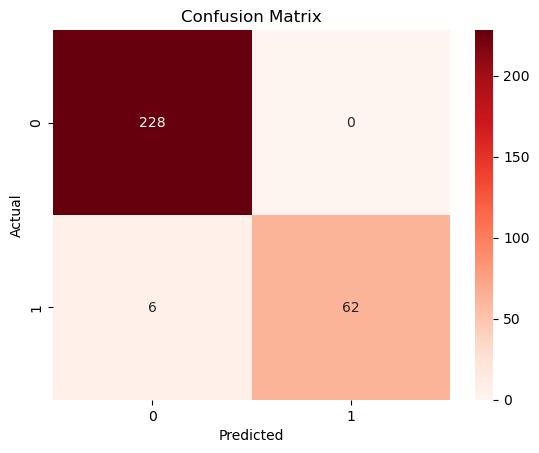

In [29]:
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

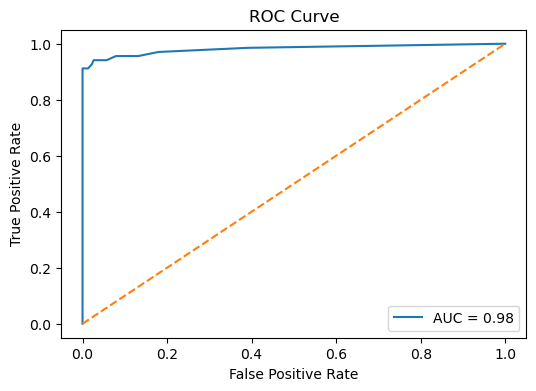

In [30]:
fpr, tpr, _ = roc_curve(y_test, y_pred_propa)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

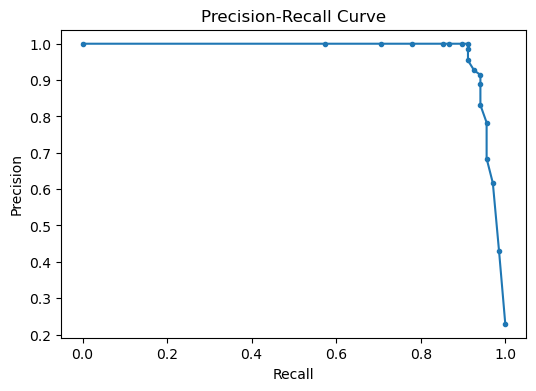

In [31]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_propa)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Make manual prediction to evaluate the model

In [32]:
Rf_model.predict([[85285.000000,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,
                   -6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,
                   -11.534046,-0.364265,-5.452495,-11.887570,-3.563585,0.876019,0.545698,
                   1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516
                   ,-0.272188,0.000000]])

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Cheecking Overfitting :

In [33]:
y_train_predict = Rf_model.predict(x_train)
accuracy_scores = accuracy_score(y_train,y_train_predict)
accuracy_scores

0.9992469879518072

In [35]:
y_predicted = Rf_model.predict(x_test)
accuracy_scores2 = accuracy_score(y_test,y_predicted)
accuracy_scores2

0.9797297297297297